<a href="https://colab.research.google.com/github/yotam-biu/tutorial4/blob/main/orf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference to this tutorial:
* http://justinbois.github.io/bootcamp/2021
* Benny Chor, Amir Rubinstein, Computational thinking for life scientists, Cambridge university press Ch. 4

# Short Questions

What is the expected output of the following lines of code?

In [ ]:
def count_in_string(letter, string, case_sensitive = False):

    if  not case_sensitive:
        string = string.upper()
        letter = letter.upper()

    count = 0
    for l in string:
        if l == letter:
            count += 1

    return count

count_in_string("L", "Hellow")

2

# ORF

Write a function, `longest_orf()`, that takes a DNA sequence as input and finds the longest open reading frame (ORF) in the sequence (we will not consider reverse complements). A sequence fragment constitutes an ORF if the following are all true.

1. The ORF begins with the codon `ATG`.
2. The ORF ends when it meets any of the stop codons: `TGA`, `TAG`, or `TAA`.
3. The total number of bases (between the beginning and ending codons) is a multiple of 3.

Note that the sequence `ATG` may appear in the middle of an ORF. So, for example,

    GGATGATGATGTAAAAC

has two ORFs, `ATGATGATGTAA` and `ATGATGTAA`. You would return the first one, since it is longer of these two.

# ORF: Step by Step

### **Step 1: Implementing the `find_all_starts` Function**

You will write a function called `find_all_starts` that scans a DNA sequence and identifies all starting positions of a specific codon, `ATG`. If the `ATG` codon is not found, the function will return an empty list.

---

#### **Example**
```python
dna = "GAATGCGGATGATG"
result = find_all_starts(dna)
print(result)  # Output: [2, 7, 10]


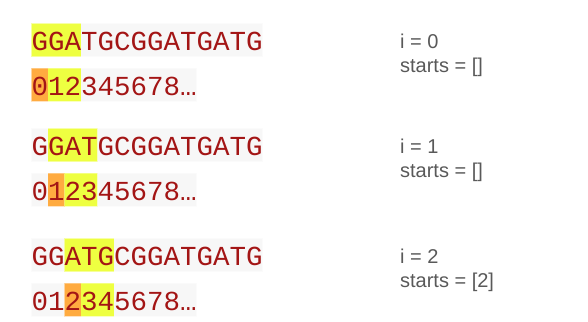

In [ ]:
def find_all_starts(dna):
    pass # Replace the pass with your code



############################################################################

def test_find_all_starts():
    assert find_all_starts("") == list()
    assert find_all_starts("GGAGACGACGCAAAAC") == list()
    assert find_all_starts("AAAAAAATGAAATGAGGGGGGTATG") == [6, 11, 22]
    assert find_all_starts("GGATGATGATGTAAAAC") == [2, 5, 8]
    assert find_all_starts("GGATGCATGATGTAGAAC") == [2, 6, 9]
    assert find_all_starts("GGGATGATGATGGGATGGTGAGTAGGGTAAG") == [3, 6, 9, 14]
    assert find_all_starts("GGGatgatgatgGGatgGtgaGtagGGACtaaG".upper()) == [3, 6, 9, 14]
    print("All tests passed successfully!")


test_find_all_starts()

All tests passed successfully!


### **Step 2: Implementing the `find_first_in_register_stop` Function**

You will write a function called `find_first_in_register_stop` that scans a DNA sequence and identifies the first occurrence of a stop codon (`TGA`, `TAG`, or `TAA`) in the register (every 3 nucleotides). If the stop codon is not found, the function will return `-1`.

---

#### **Example**

```python
dna = "ATGCGGTAAAGATAG"
result = find_first_in_register_stop(dna)
print(result)  # Output: 9


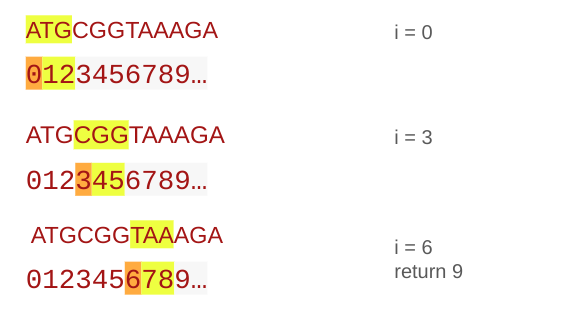

In [ ]:
def find_first_in_register_stop(dna):
    pass # Replace the pass with your code


############################################################################

def test_find_first_in_register_stop():
    assert find_first_in_register_stop("") == -1
    assert find_first_in_register_stop("GTAATAGTGA") == -1
    assert find_first_in_register_stop("AAAAAAAAAAAAAAATAAGGGTAA") == 18
    assert find_first_in_register_stop("AAAAAACACCGCGTGTACTGA") == 21
    print("All tests passed successfully!")


test_find_first_in_register_stop()

All tests passed successfully!


### **Step 3: Implementing the `all_orfs_range` Function**

You will implement a function called `all_orfs_range` that scans a DNA sequence and identifies all open reading frames (ORFs) by finding the start codons (`ATG`) and the corresponding stop codons (`TGA`, `TAG`, `TAA`), and returns the range of each ORF.

---

#### **Example**

```python
dna = "GGATGATGATGTAAAAC"
result = all_orfs_range(dna)
print(result)  # Output: [(2, 14), (5, 14), (8, 14)]


### **Step-by-Step Guide for Implementing `all_orfs_range` Function**

1. **Get Start Codon Positions**: Use the `find_all_starts` function to get all positions where `"ATG"` appears in the DNA sequence.

2. **Initialize List**: Create an empty list `orfs_ranges` to store the start and end positions of each ORF.

3. **Iterate Over Start Positions**: Loop through each start position:
   - Slice the DNA sequence from the current start and pass it to `find_first_in_register_stop` to find the first stop codon in the sliced DNA.
   - Note that the index returned from `find_first_in_register_stop` is relative to the sliced DNA, so the real end position is `start + index`.


4. **Create ORF Ranges**: If a stop codon is found (`end != -1`), add the tuple `(start, start + end)` to `orfs_ranges`.

5. **Return the Ranges**: After processing all starts, return the `orfs_ranges` list.

---


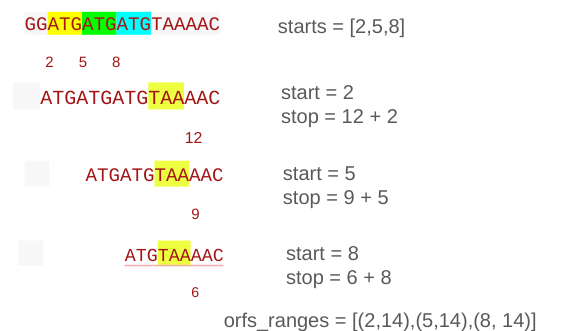

In [ ]:

def all_orfs_range(dna):
    pass # Replace the pass with your code


############################################################################

def test_all_orfs():
    assert all_orfs_range("") == list()
    assert all_orfs_range("GGAGACGACGCAAAAC") == list()
    assert all_orfs_range("AAAAAAATGAAATGAGGGGGGTATG") == [(6, 15)]
    assert all_orfs_range("GGATGATGATGTAAAAC") == [(2, 14),(5, 14),(8,14)]
    assert all_orfs_range("GGATGCATGATGTAGAAC") == [(6, 15), (9, 15)]
    assert all_orfs_range("GGGATGATGATGGGATGGTGAGTAGGGTAAG") == [(3, 21),(6, 21), (9, 21)]
    assert all_orfs_range("GGGatgatgatgGGatgGtgaGtagGGACtaaG".upper()) == [(3, 21), (6, 21), (9, 21), (14, 32)]
    print("All tests passed successfully!")


test_all_orfs()

All tests passed successfully!


### **Step 4: Implementing the `longest_orf` Function**

You will implement a function called `longest_orf` that scans a DNA sequence, finds all open reading frames (ORFs), and returns the longest ORF from the sequence.

---

#### **Example**

```python
dna = "GGATGATGATGTAAAAC"
result = longest_orf(dna)
print(result)  # Output: "ATGATGATGTAAA"


### **Step-by-Step Guide for Implementing `longest_orf` Function**

1. **Get ORF Ranges**: Use the `all_orfs_range` function to get a list of ORF start and end positions.

2. **Initialize Longest ORF**: Create a variable `longest` to store the longest ORF found during the loop.

3. **Iterate Over ORFs**: Loop through each ORF range:
   - Slice the DNA sequence from the start to the end position of each ORF.
   

4. **Update Longest ORF**:
  - Compare the length of the current ORF with the current `longest` ORF.
  - If the current ORF is longer than the current `longest`, update `longest` to the current ORF.

5. **Return the Longest ORF**: After processing all ORFs, return the `longest` ORF.

---

In [ ]:
def longest_orf(dna):
    pass # Replace pass with your code


############################################################################

def test_longest_orf():
    assert longest_orf("") == ""
    assert longest_orf("GGAGACGACGCAAAAC") == ""
    assert longest_orf("AAAAAAATGAAATGAGGGGGGTATG") == "ATGAAATGA"
    assert longest_orf("GGATGATGATGTAAAAC") == "ATGATGATGTAA"
    assert longest_orf("GGATGCATGATGTAGAAC") == "ATGATGTAG"
    assert longest_orf("GGGATGATGATGGGATGGTGAGTAGGGTAAG") == "ATGATGATGGGATGGTGA"
    assert longest_orf("GGGatgatgatgGGatgGtgaGtagGGACtaaG") in ["atgGtgaGtagGGACtaa","atgatgatgGGatgGtga"]
    print("All tests passed successfully!")

test_longest_orf()

All tests passed successfully!


# The Re Module

**Example1**: The `longest_orf()` function with the re module

In [ ]:
import re

def longest_orf(dna):
    # Define the regular expression pattern for matching ORFs
    orf_pattern = "ATG((?!TAA|TAG|TGA)...)*(TAG|TAA|TGA)"

    # Find all non-overlapping matches of the ORF pattern in the DNA sequence
    orfs = re.finditer(orf_pattern, dna.upper())

    # Iterate over the ORF matches and return the longest one
    for orf in orfs:
        return dna[orf.start(): orf.end()] # Return the DNA sequence corresponding to the ORF

    # If no ORFs are found, return an empty string
    return ""



test_longest_orf()

1. **"ATG"**  
   Matches the start codon `ATG`, which signals the start of a coding sequence.

2. **`((?!TAA|TAG|TGA)...) *`**  
   This part is more complex. Let’s break it into smaller pieces:

   a. **`...`**  
      Matches exactly three characters (a codon) in the sequence. This ensures codons are read as triplets.

   b. **`(?!TAA|TAG|TGA)`**  
      This is a negative lookahead assertion.  
      It ensures that the next three characters are not `TAA`, `TAG`, or `TGA` (the stop codons).  
      In essence, this ensures that only non-stop codons are matched.

   c. **`((?!TAA|TAG|TGA)...)`**  
      Matches a codon (three characters) only if it is not a stop codon.

   d. **`((?!TAA|TAG|TGA)...) *`**  
      The `*` means the pattern can repeat zero or more times.  
      This matches any number of consecutive codons, as long as none of them are stop codons.

3. **`(TAG|TAA|TGA)`**  
   Matches one of the stop codons: `TAG`, `TAA`, or `TGA`.  
   This ensures the sequence ends with a valid stop codon.


**Example2**: Finding Emails in a string

In [ ]:
import re

doc = "John Smith <john.smith@example.com> sent an email to Jane Doe <jane.doe@example.com>."

email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

emails = re.findall(email_pattern, doc)

print(emails)

['john.smith@example.com', 'jane.doe@example.com']


In this example, we use the `re.findall()` function to find all occurrences of email addresses in the document. The regular expression email_pattern matches email addresses that follow the standard format: a series of characters, including dots, underscores, percentage signs, and plus and minus signs, followed by an at symbol, followed by a domain name consisting of letters, numbers, dots, and hyphens, followed by a top-level domain consisting of two or more letters.

The regular expression breaks down as follows:

* \b matches a word boundary, which ensures that the email address is not part of a larger word.
* [A-Za-z0-9._%+-]+ matches one or more occurrences of letters, digits, dots, underscores, percentage signs, plus signs, or minus signs, which make up the username portion of the email address.
* @ matches the at symbol, which separates the username from the domain name.
* [A-Za-z0-9.-]+ matches one or more occurrences of letters, digits, dots, or hyphens, which make up the domain name.
* \. matches a literal dot, which separates the domain name from the top-level domain.
* [A-Z|a-z]{2,} matches two or more occurrences of uppercase or lowercase letters, which make up the top-level domain.